In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

## Training Data

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [ ]:
test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)
testdata = testdata.drop("id", axis=1)
testdata.head()


,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,4,6,3,5,6,7,8,7,8,4,8,5,7,5,6,3,6,4,4,5
1,4,4,2,9,5,5,4,7,5,4,2,4,7,4,5,1,7,4,4,3
2,1,3,6,5,7,2,4,6,4,2,7,9,2,5,5,2,3,6,8,3
3,2,4,4,6,4,5,4,3,4,4,7,8,4,6,7,6,4,2,4,4
4,6,3,2,4,6,4,5,5,3,7,4,3,2,6,4,6,8,4,5,5


In [ ]:
import pandas as pd

test_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/test.csv?raw=true'
testdata = pd.read_csv(test_url)
testdata = testdata.drop("id", axis=1)
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   MonsoonIntensity                 745305 non-null  int64
 1   TopographyDrainage               745305 non-null  int64
 2   RiverManagement                  745305 non-null  int64
 3   Deforestation                    745305 non-null  int64
 4   Urbanization                     745305 non-null  int64
 5   ClimateChange                    745305 non-null  int64
 6   DamsQuality                      745305 non-null  int64
 7   Siltation                        745305 non-null  int64
 8   AgriculturalPractices            745305 non-null  int64
 9   Encroachments                    745305 non-null  int64
 10  IneffectiveDisasterPreparedness  745305 non-null  int64
 11  DrainageSystems                  745305 non-null  int64
 12  CoastalVulnerability          

In [ ]:
df.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


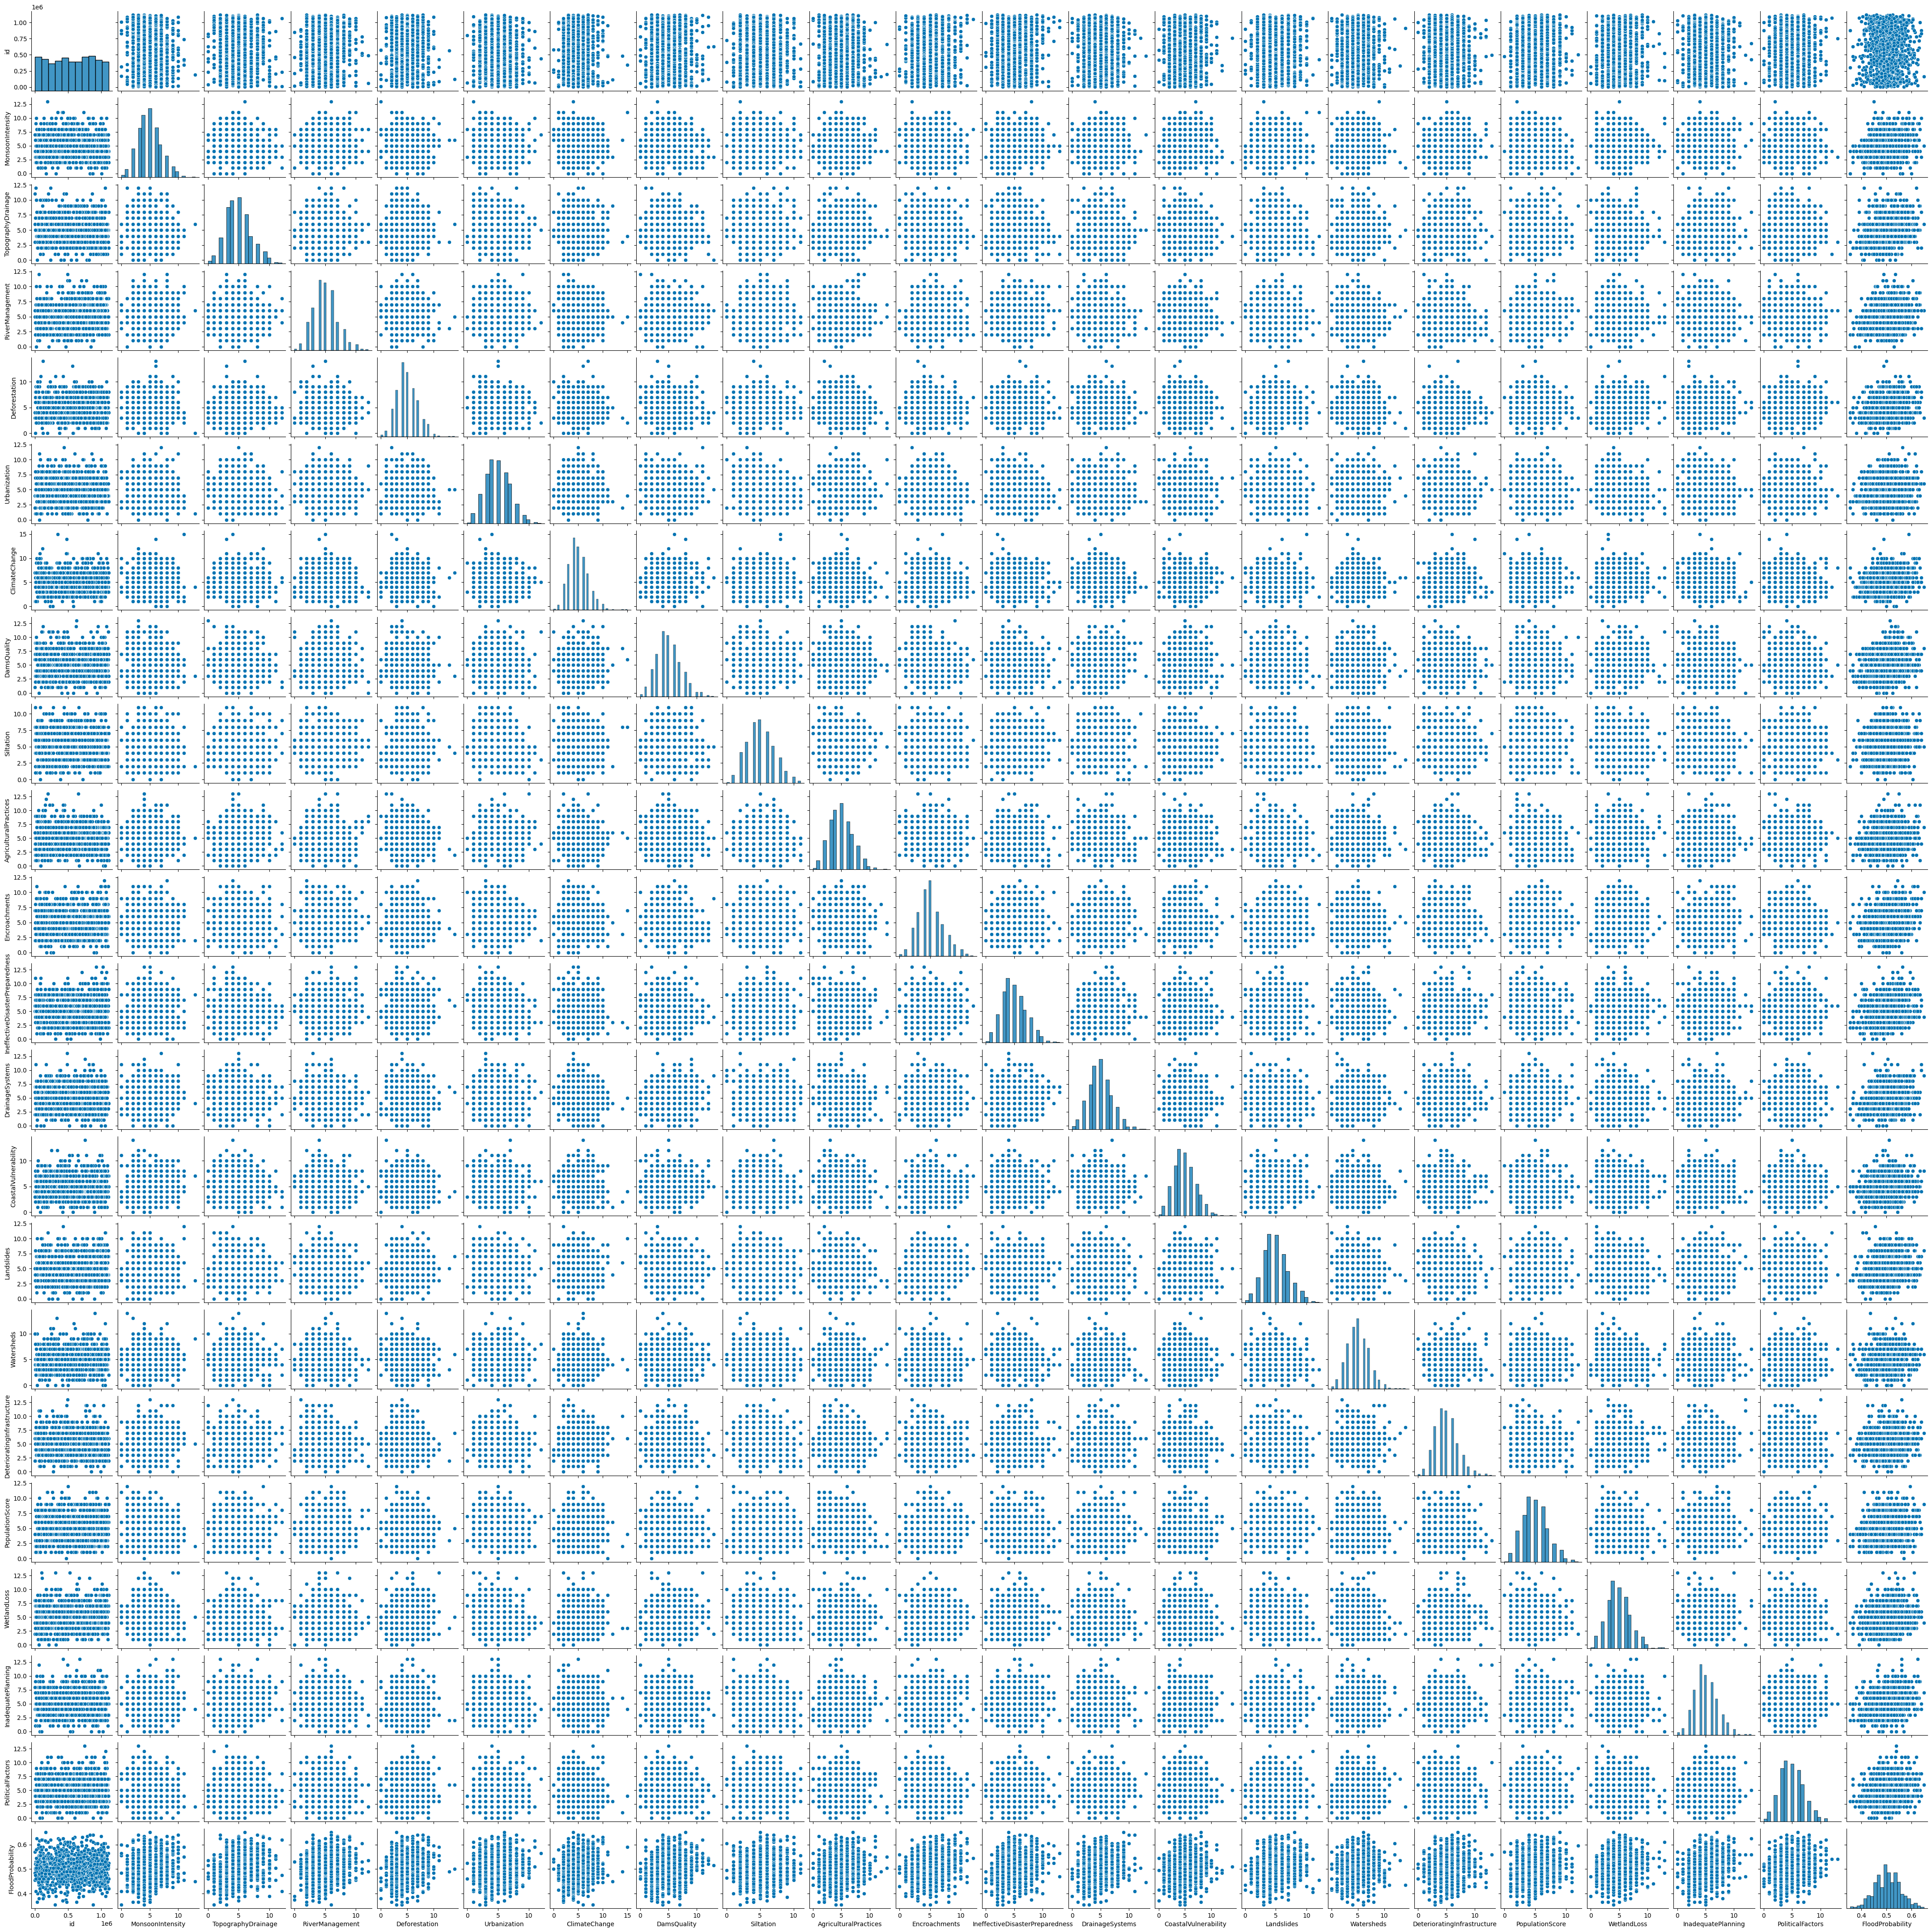

In [ ]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('train.csv')
sns.set_palette('colorblind')
sns.pairplot(data=df.sample(n=1000), height=2)

## DATA VISUALIZATION




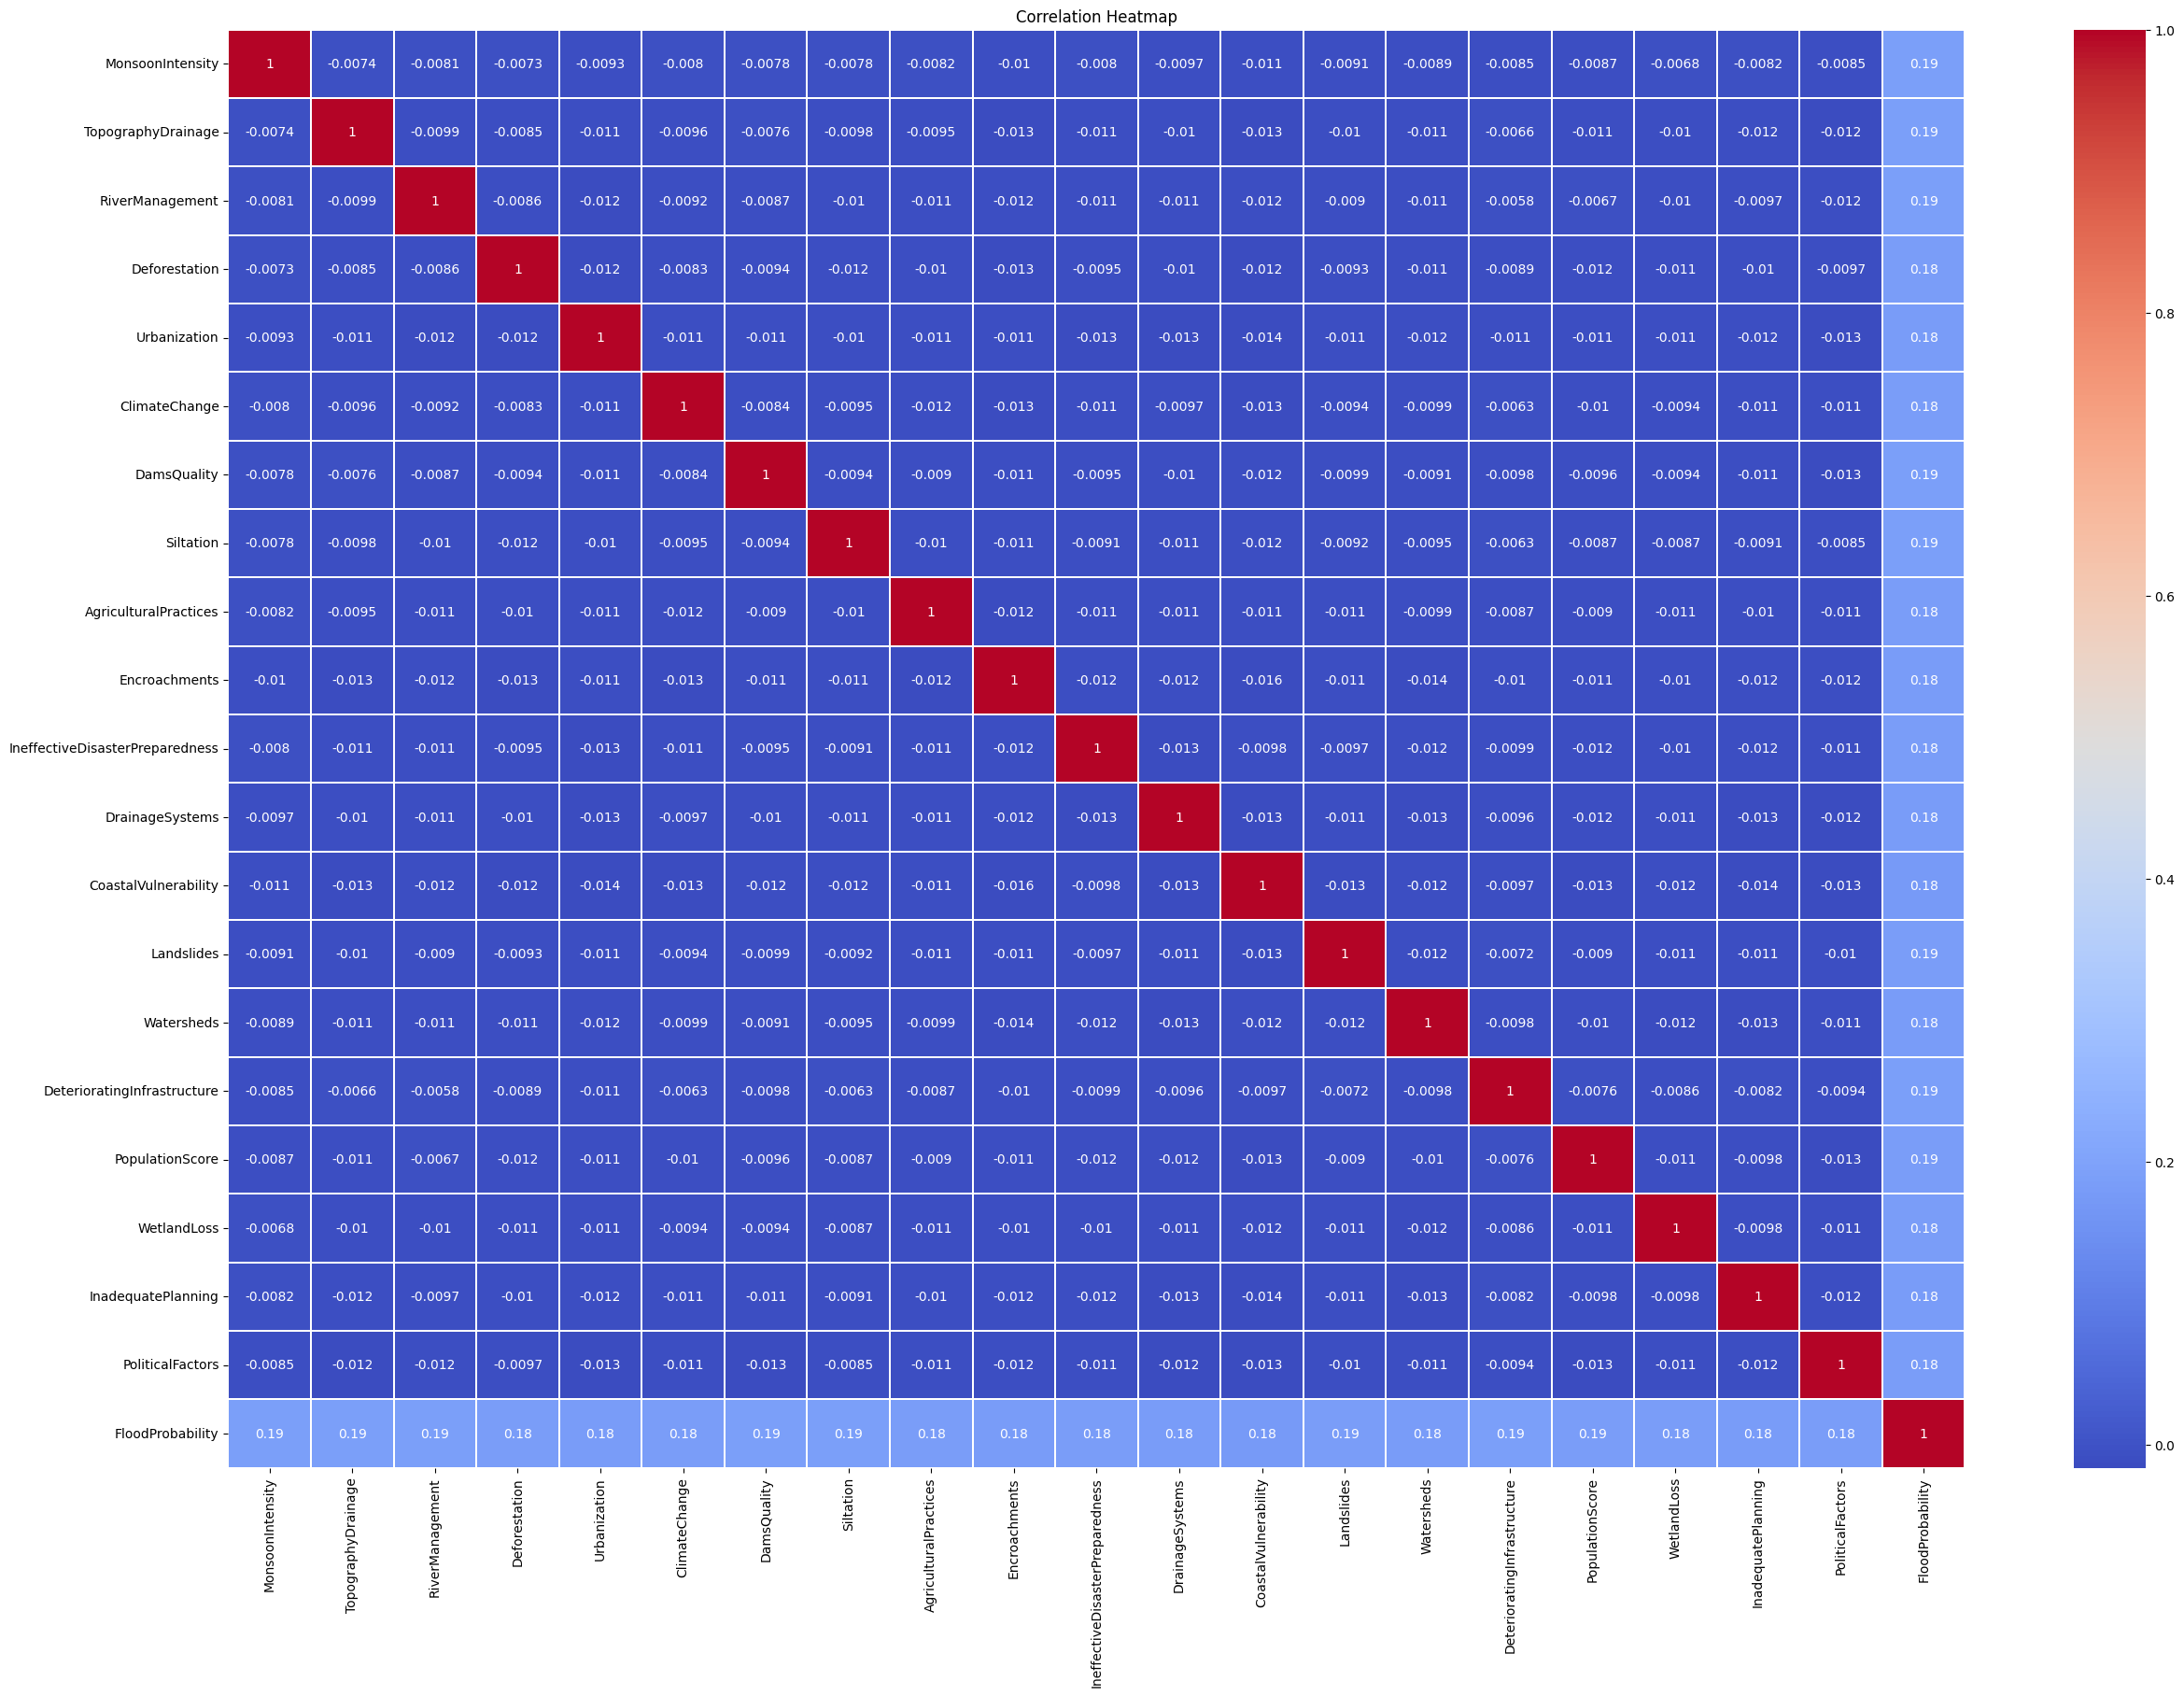

In [ ]:
plt.figure(figsize=(30,20))
corr = df.drop('id',axis=1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Correlation Heatmap')
plt.show()

## SPLITTING
> Add blockquote




In [76]:
X = df.drop(['FloodProbability', 'id'], axis=1)
y = df['FloodProbability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)

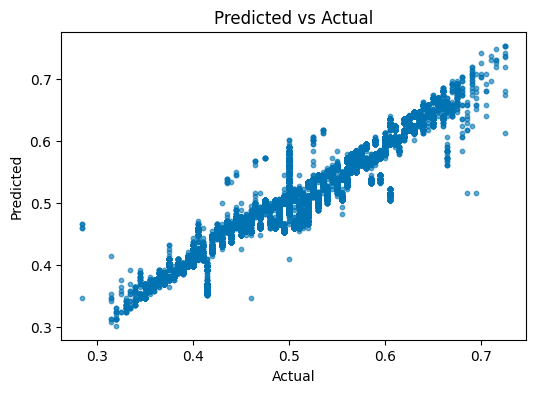

In [ ]:

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, s=10, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual")
plt.show()

## MODEL


In [ ]:
# Set independent and dependent variables
X = df[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors']]
X = sm.add_constant(X)
X_test = sm.add_constant(X_test)
y = df['FloodProbability']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 21 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   const                            1117957 non-null  float64
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [ ]:
# Fit the model using the training data
model.fit(X_train, y_train)

# Test the model using the testing data
# Drop the 'const' column from X_test before predicting with sklearn model
X_test_no_const = X_test.drop('const', axis=1, errors='ignore')
y_pred = model.predict(X_test_no_const)
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)

Intercept: -0.053327075659363454
Coefficients: [1.51472120e-12 5.61300773e-03 5.64511207e-03 5.66240683e-03
 5.68107516e-03 5.65936646e-03 5.65875345e-03 5.65295214e-03
 5.63975223e-03 5.63933881e-03 5.64593107e-03 5.63952970e-03
 5.63264203e-03 5.67106533e-03 5.64308413e-03 5.64769106e-03
 5.61824108e-03 5.68148608e-03 5.63950223e-03 5.61202549e-03
 5.64552237e-03]


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 1117957 entries, 0 to 1117956
Series name: FloodProbability
Non-Null Count    Dtype  
--------------    -----  
1117957 non-null  float64
dtypes: float64(1)
memory usage: 8.5 MB


In [ ]:
olsmod = sm.OLS(y, X).fit()
olsmod.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FloodProbability   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                 3.046e+05
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:40:02   Log-Likelihood:             2.7820e+06
No. Observations:             1117957   AIC:                        -5.564e+06
Df Residuals:                 1117936   BIC:                        -5.564e+06
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0533      0.000   -234.995      0.000      -0.054      -0.053
MonsoonIntensity                    0.0056   9.25e-06    606.734      0.000       0.006       0.006
TopographyDrainage                  0.0056   9.09e-06    621.525      0.000       0.006       0.006
RiverManagement                     0.0057   9.18e-06    617.178      0.000       0.006       0.006
Deforestation                       0.0057   9.27e-06    612.404      0.000       0.006       0.006
Urbanization                        0.0057   9.14e-06    619.319      0.000       0.006       0.006
ClimateChange                       0.0057   9.25e-06    612.437      0.000       0.006       0.006
DamsQuality                         0.0057   9.13e-06    619.170      0.000       0.006       0.006
Siltation                           0.0056   9.21e-06    612.284      0.000       0.006       0.006
AgriculturalPractices               0.0056    9.2e-06    612.643      0.000       0.006       0.006
Encroachments                       0.0056   9.14e-06    618.374      0.000       0.006       0.006
IneffectiveDisasterPreparedness     0.0056   9.16e-06    615.995      0.000       0.006       0.006
DrainageSystems                     0.0056   9.18e-06    613.641      0.000       0.006       0.006
CoastalVulnerability                0.0057   9.11e-06    622.228      0.000       0.006       0.006
Landslides                          0.0056   9.15e-06    616.245      0.000       0.006       0.006
Watersheds                          0.0056   9.14e-06    617.853      0.000       0.006       0.006
DeterioratingInfrastructure         0.0056   9.21e-06    609.647      0.000       0.006       0.006
PopulationScore                     0.0057   9.17e-06    618.914      0.000       0.006       0.006
WetlandLoss                         0.0056    9.2e-06    612.654      0.000       0.006       0.006
InadequatePlanning                  0.0056   9.14e-06    613.363      0.000       0.006       0.006
PoliticalFactors                    0.0056    9.1e-06    620.512      0.000       0.006       0.006
==============================================================================
Omnibus:                   100155.250   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           148528.907
Skew:                           0.703   Prob(JB):                         0.00
Kurtosis:                       4.100   Cond. No.                         265.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
y_pred_df = pd.DataFrame(y_pred, columns=['FloodProbability'])
y_pred_df.head()

,FloodProbability
0,0.533925
1,0.584911
2,0.522570
3,0.539377
4,0.579178


In [ ]:
# Without CoastalVulnerability
X = df[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'InadequatePlanning', 'PoliticalFactors']]
X = sm.add_constant(X)
y = df['FloodProbability']
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FloodProbability   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                 2.230e+05
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:40:05   Log-Likelihood:             2.6158e+06
No. Observations:             1117957   AIC:                        -5.232e+06
Df Residuals:                 1117937   BIC:                        -5.231e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0170      0.000    -66.869      0.000      -0.018      -0.017
MonsoonIntensity                    0.0055   1.07e-05    515.973      0.000       0.006       0.006
TopographyDrainage                  0.0056   1.05e-05    527.501      0.000       0.006       0.006
RiverManagement                     0.0056   1.07e-05    524.234      0.000       0.006       0.006
Deforestation                       0.0056   1.08e-05    519.706      0.000       0.006       0.006
Urbanization                        0.0056   1.06e-05    524.395      0.000       0.006       0.006
ClimateChange                       0.0056   1.07e-05    519.443      0.000       0.006       0.006
DamsQuality                         0.0056   1.06e-05    525.743      0.000       0.006       0.006
Siltation                           0.0056   1.07e-05    520.030      0.000       0.006       0.006
AgriculturalPractices               0.0056   1.07e-05    520.394      0.000       0.006       0.006
Encroachments                       0.0055   1.06e-05    522.649      0.000       0.006       0.006
IneffectiveDisasterPreparedness     0.0056   1.06e-05    524.059      0.000       0.006       0.006
DrainageSystems                     0.0055   1.07e-05    520.044      0.000       0.006       0.006
Landslides                          0.0056   1.06e-05    522.611      0.000       0.006       0.006
Watersheds                          0.0056   1.06e-05    524.449      0.000       0.006       0.006
DeterioratingInfrastructure         0.0055   1.07e-05    518.976      0.000       0.006       0.006
PopulationScore                     0.0056   1.06e-05    524.855      0.000       0.006       0.006
WetlandLoss                         0.0056   1.07e-05    520.109      0.000       0.006       0.006
InadequatePlanning                  0.0055   1.06e-05    519.585      0.000       0.005       0.006
PoliticalFactors                    0.0056   1.06e-05    526.080      0.000       0.006       0.006
==============================================================================
Omnibus:                    33667.223   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38593.192
Skew:                           0.400   Prob(JB):                         0.00
Kurtosis:                       3.436   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Without InadequatePlanning
X = df[['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement', 'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality', 'Siltation', 'AgriculturalPractices', 'Encroachments', 'IneffectiveDisasterPreparedness', 'DrainageSystems', 'CoastalVulnerability', 'Landslides', 'Watersheds', 'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss', 'PoliticalFactors']]
X = sm.add_constant(X)
y = df['FloodProbability']
olsmod = sm.OLS(y, X).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       FloodProbability   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                 2.251e+05
Date:                Fri, 05 Sep 2025   Prob (F-statistic):               0.00
Time:                        12:40:08   Log-Likelihood:             2.6199e+06
No. Observations:             1117957   AIC:                        -5.240e+06
Df Residuals:                 1117937   BIC:                        -5.239e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -0.0185      0.000    -72.739      0.000      -0.019      -0.018
MonsoonIntensity                    0.0056   1.07e-05    519.397      0.000       0.006       0.006
TopographyDrainage                  0.0056   1.05e-05    530.191      0.000       0.006       0.006
RiverManagement                     0.0056   1.06e-05    527.459      0.000       0.006       0.006
Deforestation                       0.0056   1.07e-05    522.912      0.000       0.006       0.006
Urbanization                        0.0056   1.06e-05    528.126      0.000       0.006       0.006
ClimateChange                       0.0056   1.07e-05    522.779      0.000       0.006       0.006
DamsQuality                         0.0056   1.06e-05    528.324      0.000       0.006       0.006
Siltation                           0.0056   1.06e-05    523.583      0.000       0.006       0.006
AgriculturalPractices               0.0056   1.06e-05    523.102      0.000       0.006       0.006
Encroachments                       0.0056   1.06e-05    526.953      0.000       0.006       0.006
IneffectiveDisasterPreparedness     0.0056   1.06e-05    525.105      0.000       0.006       0.006
DrainageSystems                     0.0055   1.06e-05    522.479      0.000       0.006       0.006
CoastalVulnerability                0.0056   1.05e-05    529.285      0.000       0.006       0.006
Landslides                          0.0056   1.06e-05    525.904      0.000       0.006       0.006
Watersheds                          0.0056   1.06e-05    526.153      0.000       0.006       0.006
DeterioratingInfrastructure         0.0056   1.06e-05    521.877      0.000       0.006       0.006
PopulationScore                     0.0056   1.06e-05    528.814      0.000       0.006       0.006
WetlandLoss                         0.0056   1.06e-05    523.407      0.000       0.006       0.006
PoliticalFactors                    0.0056   1.05e-05    529.211      0.000       0.006       0.006
==============================================================================
Omnibus:                    34124.081   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39085.646
Skew:                           0.404   Prob(JB):                         0.00
Kurtosis:                       3.433   Cond. No.                         250.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
sample_submission_url = 'https://github.com/robitussin/CCMACLRL_EXAM/blob/ebd51da1dafde093c18d9e8f35c834d91b2887f7/datasets/sample_submission.csv?raw=true'

samplefile = pd.read_csv(sample_submission_url)

id = samplefile.pop('id')
y_pred = model.predict(testdata)

# Create a submission DataFrame
submission_df = pd.DataFrame({
    'id': id,
    'FloodProbability': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission_file.csv', index=False)
print("Submission file created: submission_file.csv")

Submission file created: submission_file.csv
